# **Inferencia estadística**
# IE04. Distribuciones de probabilidad discretas




## <font color='blue'>__Bibliografía__</font>
* Estadística para Administración y Economía. Paul Newbold, William L. Carlson y Betty Thorne, 2013.

* Estadística Aplicada a los Negocios y la Economía. Allen L. Webster, 2000.

* Fundamentos de Estadística. Peña Sánchez de Rivera, Daniel, 2008.

## <font color='blue'>__Lecturas__</font>

* López-Briega, R. (2016). Distribuciones de probabilidad con Python.

* Charles M. Grinstead & J. Laurie Snell (LibreTexts). Distribución de probabilidad discreta.

* Davis, S., Fard, N. (2020). Theoretical bounds and approximation of the probability mass function of future hospital bed demand. Health Care Manag Sci 23, 20–33.

Nota: Los contenios de este notebook están basados en el trabajo de Raúl E. López Briega. El contenido esta bajo la licencia BSD de Raúl E. López Briega.

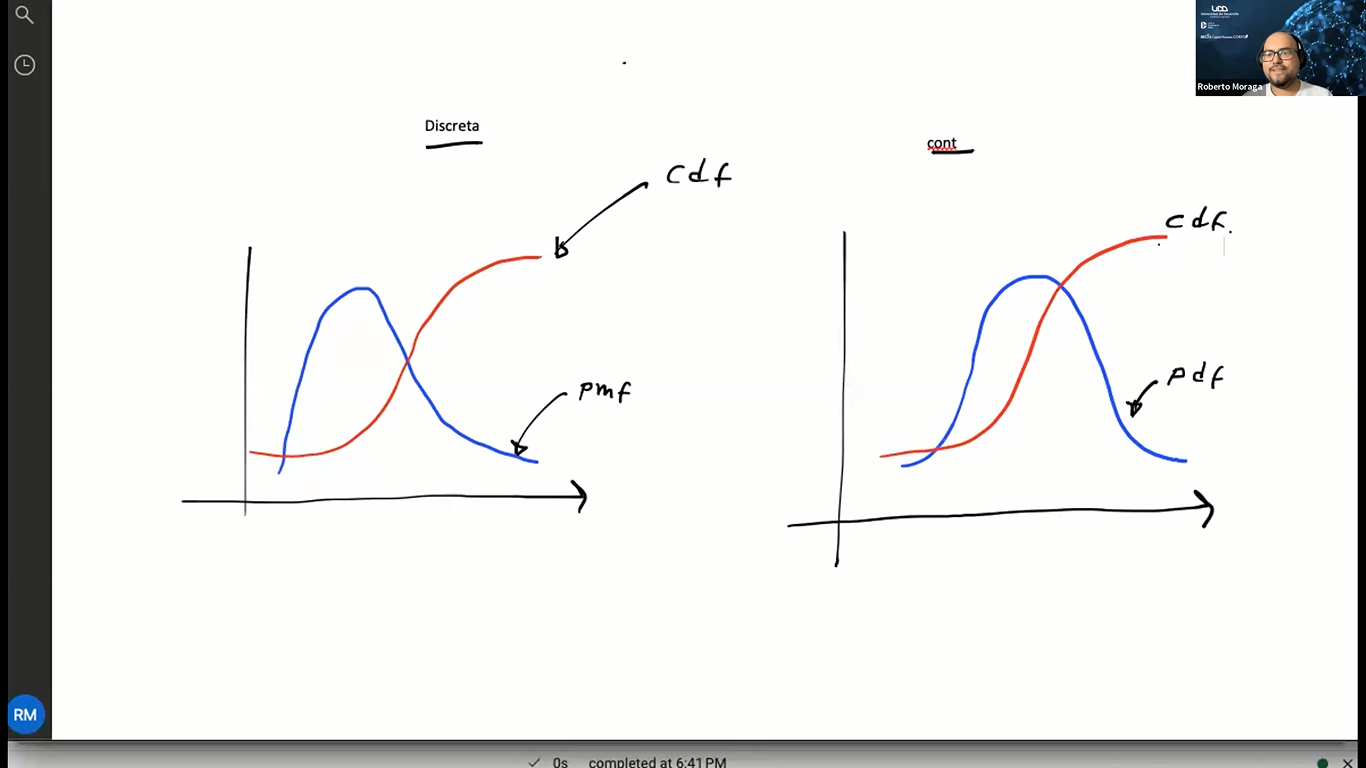

## <font color='blue'>**Distribuciones**</font>

Ahora que ya conocemos como podemos hacer para representar a las distribuciones, pasemos a analizar cada una de ellas en más detalle para conocer su forma, sus principales aplicaciones y sus propiedades. Comencemos por las [distribuciones discretas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad#Distribuciones_de_variable_discreta).

<font color='red'>Nota:</font>
De cara a poder crear y trabajar con las distintas distribuciones de probabilidad en Python, utilizaremos la librería [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). Te recomendamos su revisión de forma independiente y autónoma.



In [ ]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

## <font color='blue'>**Distribuciones Discretas**</font>

Las distribuciones discretas son aquellas en las que la variable puede tomar solo algunos valores determinados. Los principales exponentes de este grupo son las siguientes:

### <font color='blue'>**Distribución Uniforme Discreta**</font>


Una variable aleatoria ($X$) tiene una [Distribución Uniforma Discreta](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_uniforme_discreta#:~:text=resultados%20diferentes%2C%20todos%20tienen%20la,determinada%20es%20de%201%2F6.) cuando la probabilidad en todos los
puntos de masa probabilística es la misma; es decir, cuando todos los posibles valores que puede adoptar la variable

$$
x_1, x_2, x_3, \dots, x_n
$$
tienen la misma probabilidad.

Diremos por tanto que:

$$
X \sim U{(n) }
$$
Utilizando el socorrido pero útil caso del lanzamiento de un dado. Si definimos una variable aleatoria ($X$) como el número resultante tras su lanzamiento, los valores que puede tomar esa variable aleatoria son $[1, 2, 3, 4, 5, 6]$. Pues bien, esa variable aleatoria tiene distribución uniforme porque la probabilidad de cada cara es $1/6$.

En vista de lo dicho, la función de masa de una variable aleatoria discreta con distribución uniforme será:


$$ f(x) =P(X=x) \begin{cases} \frac{1}{n} & \quad \text{si } \ x=x_{i}& \quad i=1,2,3,...,n \\ 0 & \quad \text{en otro caso}\end{cases} $$


En nuestro sencillo ejemplo del lanzamiento de un dado, la función de cuantía, es decir, la probabilidad de que salga un resultado determinado será:

$$ P(X=x) \begin{cases} \frac{1}{6}& \quad \text{si } \ x=x_{i}& \quad i=1,2,3,4,5,6 \\ 0 & \quad \text{en otro caso}\end{cases} $$



__USOS__:
- Selección de un carta de un mazo.
- Ruleta.
- Dados.
- Muestreo simple (equiprobabilidad de las muestras).
- Simulaciones del tipo Montecarlo.
- Generación de números pseudo-aleatorios en los lenguajes de programación.

In [ ]:
 # Generamos una muestra de 1000 elementos, con
# un valor mínimo a=-3 y un máximo b=11 (12 para obtener 11, recordar que se detiene justo antes)
a = -3
b = 12
uniforme_d = stats.randint(a, b)  #La función randint(a, b) genera un número entero entre a y b, ambos incluidos. Genera N (muchos) casos de muestra.

In [ ]:
mean, var, skew, kurt = uniforme_d.stats(moments='mvsk') #variable aleatoria continua. Distribuciones Discretas. => stats(moments='mvsk') el m media; v varianza; s Asimetria; k Curtosis.
print('Momentos')
print(f'Media = {mean: 4.2f}')
print(f'Varianza = {var: 4.2f}')
print(f'Asimetría (skewness) = {skew: 4.2f}')
print(f'Curtosis = {kurt: 4.2f}')

Momentos
Media =  4.00
Varianza =  18.67
Asimetría (skewness) =  0.00
Curtosis = -1.21


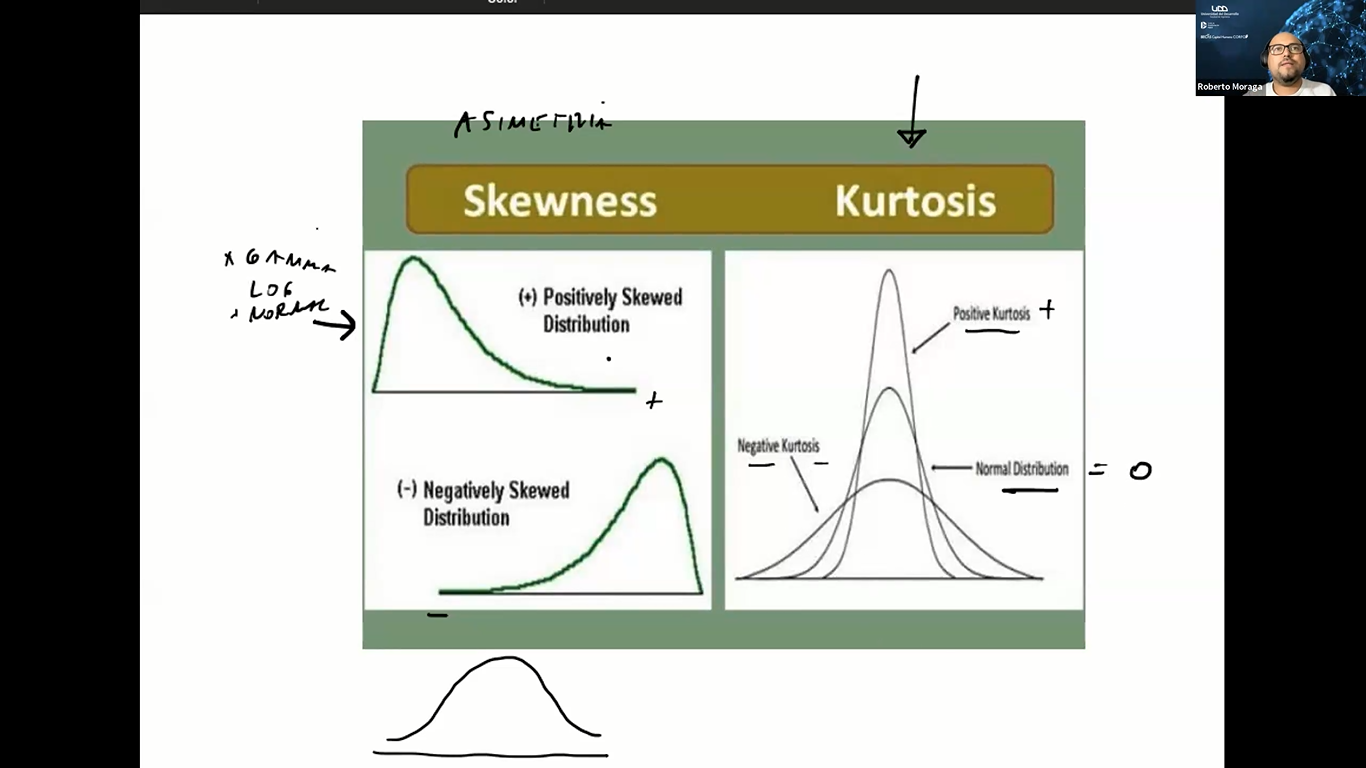

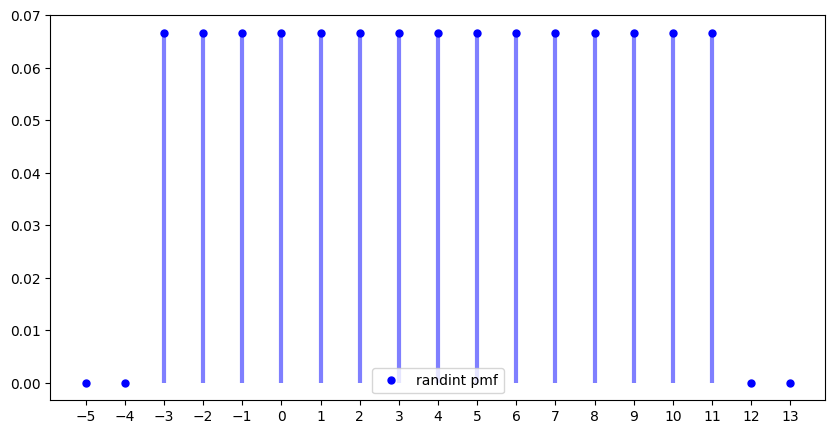

In [ ]:
# Veamos la función de probabilidad de masa

fig, ax = plt.subplots(1, 1, figsize=(10,5)) # plt.subplots() is a function that returns a tuple containing a figure and axes object(s).
                                             # Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax.

# generamos un rango uniformemente distribuido entre -5 y 14 para graficar la probabilidad de cada valor
# Ponemos dos valores antes y después para ver la probabilidad 0 de los mismos
x = np.arange(-5, b + 2)  # arreglo de -5 hasta b+2
ax.set_xticks(x)          # marcadores eje x
ax.plot(x, uniforme_d.pmf(x,), 'bo', ms=5, label='randint pmf') # Grafico de masa de probabilidad. ms = tamaño
ax.vlines(x, 0, uniforme_d.pmf(x), colors='b', lw=3, alpha=0.5) # Lineas verticales
plt.legend()              # mostramos la etiqueta 'randint pmf'
plt.show()

### <font color='green'>Actividad  1</font>

Genere 100 lanzamientos de un dado perfecto y calcule media, desviación estándar, mediana y moda.

Tip: utilice el método ```rvs```

In [ ]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

# Generamos una muestra de 100 lanzamientos de un dado perfecto (valores entre 1 y 6)
lanzamientos = stats.randint(1, 7).rvs(size=100)

# Calcular estadísticas descriptivas
media = np.mean(lanzamientos)
desviacion_estandar = np.std(lanzamientos)
mediana = np.median(lanzamientos)

# Calcular la moda
moda = stats.mode(lanzamientos)

# Calcular la moda (stats.mode devuelve un objeto ModeResult, por lo que accedemos a la moda usando .mode[0])
moda2 = stats.mode(lanzamientos)[0]

# Imprimir estadísticas
print(f"Media              : {media:4.3f}")
print(f"Desviación Estándar: {desviacion_estandar:4.3f}")
print(f"Mediana            : {mediana:4.3f}")
print(f"Moda               : {moda}")
print(f"Moda               : {moda2}")

Media              : 3.420
Desviación Estándar: 1.784
Mediana            : 3.000
Moda               : ModeResult(mode=6, count=21)
Moda               : 6


In [ ]:
# Solución más directa

from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

# Generamos una muestra de 100 lanzamientos de un dado perfecto (valores entre 1 y 6)
lanzamientos2 = stats.randint(1, 7).rvs(size=100)

# Calcular la moda (stats.mode devuelve un objeto ModeResult, por lo que accedemos a la moda usando .mode[0])
#moda2 = stats.mode(lanzamientos2)[0]

# Calcular estadísticas descriptivas e imprimir estadísticas
print(f"Media\t\t\t: {np.mean(lanzamientos2):4.2f}")
print(f"Desviación Estándar\t: {np.std(lanzamientos2):4.2f}")
print(f"Mediana\t\t\t: {np.median(lanzamientos2):4.2f}")
print(f'Moda poblacional es {stats.mode(lanzamientos2)[0]} y se repite {stats.mode(lanzamientos2)[1]} veces')

Media			: 3.48
Desviación Estándar	: 1.84
Mediana			: 3.50
Moda poblacional es 1 y se repite 25 veces


<font color='green'>Fin actividad 1</font>

### <font color='blue'>**Distribución de Bernoulli**</font>

Para comprender el proceso de Bernoulli pensemos, por
ejemplo, en situaciones en las que sólo hay dos posibles
resultados mutuamente excluyentes:

1. Verdadero/Falso, en una prueba

2. Defectuoso/no defectuoso, en los artículos que salen de una fábrica

3. Aprobado/suspendido, en los resultados de un examen, etc.

Decimos que son mutuamente excluyentes porque no pueden darse simultáneamente (un examen no puede estar aprobado y reprobado al mismo tiempo; una respuesta no puede ser simultáneamente verdadera o falsa, etc.). Una manera común de designar estos dos resultados es como Éxito (E) o Fracaso (F).

Una segunda característica de los fenómenos que siguen el denominado __Proceso de Bernoulli__ es que las pruebas de las que se obtienen los éxitos o los fracasos son independiente. Así, el hecho de que un artículo salga defectuoso en una línea de producción no tiene que ver con el resultado obtenido en el
siguiente artículo que examinamos.

Por último, una tercera característica de este proceso es que las probabilidades de Éxito o Fracaso son constantes.

Los fenómenos que en la vida real cumplen estas tres características pueden ser considerados como Procesos de Bernoulli.

Por lo tanto, la [Distribución de Bernoulli](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Bernoulli) describe un experimento probabilístico en donde en un sólo ensayo, éste tiene dos posibles resultados, éxito o fracaso.

Llamemos $p$ a la probabilidad de éxito: $P(E) = p$,<br> y llamemos $q$ a la probabilidad de fracaso: $P(F) = (1 - p)$

Definamos ahora una variable aleatoria $X$, tal que:

$$
\begin{split}
            X &= 1 &\quad  \mbox{si el resultado es un éxito}  \\
            X &= 0 &\quad  \mbox{si el resultado es un fracaso }  
\end{split}
$$
Luego $X \in \{0, 1\}$

Entonces:

$$
\begin{split}
P(E) &=  P(X=1)=p
\\
P(F) &= P(X=0)=(1-p)=q
\end{split}
$$
<br><br>
De esta manera, la Distribución de Bernoulli está dada por:

$$ X\sim B{(1,p) } $$

donde

$$
f(x) = \left\{
	\begin{array}{ll}
            1 - p = q  & \mbox{si } x = 0 \quad \mbox{(fracaso)}\\
                     p & \mbox{si } x = 1 \quad \mbox{(éxito)}
	\end{array}
\right.
$$

Tanto $p$ como $q$ van a estar limitados al intervalo de cero a uno.  Desde esta distribución se pueden deducir varias Funciones de Densidad de Probabilidad de otras distribuciones que se basen en una serie de ensayos **independientes**.

__USOS:__

* En epidemiología, se utiliza en experimentos y ensayos clínicos para modelar un solo individuo que experimenta un evento como la muerte, una enfermedad o la exposición a una enfermedad. El modelo es un excelente indicador de la probabilidad de que una persona tenga el evento en cuestión.
* Tratamientos médicos (efectivos o inefectivos).
* Metas de producción (se logran o no se logran)

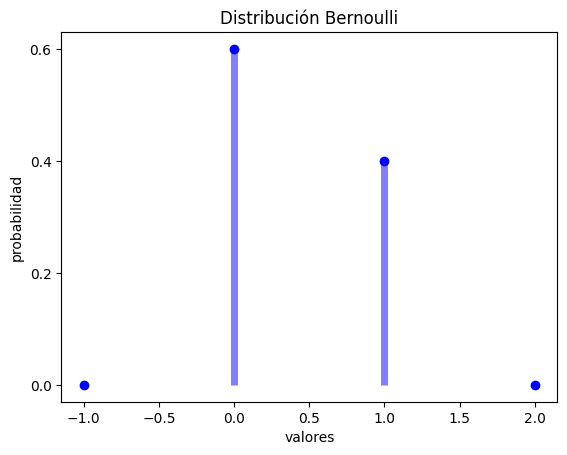

In [ ]:
# Graficando Bernoulli
p =  0.4 # parámetro de forma. Probabilidad de exito
bernoulli = stats.bernoulli(p)
x = np.arange(-1, 3)
fmp = bernoulli.pmf(x) # Función de Masa de Probabilidad por que es una distribución discreta
fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6])
plt.title('Distribución Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

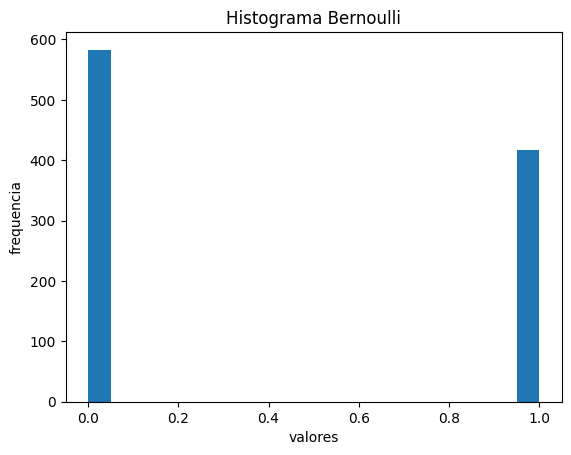

In [ ]:
# histograma
aleatorios_bll = bernoulli.rvs(1000)  # genera 1.000 valores aleatorios. Entre más valores, más se acerca a la propabilidad 0.6 o 0.4
cuenta, cajas, ignorar = plt.hist(aleatorios_bll, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Bernoulli')
plt.show()

In [ ]:
# Calculemos los parámetros de la población
print(f'Media poblacional\t\t= {aleatorios_bll.mean():4.2f}')
print(f'Desviación estándar poblacional\t= {aleatorios_bll.std():4.2f}')
print(f'Mediana poblacional\t\t= {np.median(aleatorios_bll):4.2f}')
print(f'Moda poblacional es {stats.mode(aleatorios_bll)[0]} y se repite {stats.mode(aleatorios_bll)[1]} veces')

Media poblacional		= 0.42
Desviación estándar poblacional	= 0.49
Mediana poblacional		= 0.00
Moda poblacional es 0 y se repite 583 veces


### <font color='blue'>**Distribución Binomial**</font>

La [Distribución Binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial) es una distribución discreta muy importante que surge en muchas aplicaciones bioestadísticas. Fue obtenida por Jakob Bernoulli (1654-1705) y publicada en su obra póstuma Ars Conjectandi en 1713.<br>

Sea un experimento aleatorio en el que pueden obtenerse dos
resultados posibles, mutuamente excluyentes, con
probabilidades constantes en el que $p$ es la probabilidad de
éxito.

Supongamos que se realizan n pruebas independientes (es decir,
se dan las condiciones de Bernoulli) y tenemos una sucesión
de Bernoulli de tamaño $n$.

Ejemplo:

Supongamos que estamos estudiando una familia de la comuna de Vitacura y preguntamos si tiene lavavajillas o no.

En este caso estamos  frente a  una distribución de Bernoulli porque la respuesta será 0 (no tiene) y 1 (tiene). Sin embargo, al preguntar a más familias de la comuna, vamos a denotar por $ x_{i} $ a la familia i-ésima que se le hace la consulta. Bajo este esquema de trabajo, llamaremos sucesión de Bernoulli a aquella serie que viene dada por $x_{1}, x_{2}, x_{3},\dots, x_{n}$, en donde cada $x_{i}$ indica si la familia $i$ tiene lavavajillas, en este caso tomará el valor 1, o no tiene lavavajillas, en este caso tomará el valor 0. Por otra parte, el que la familia $i$ tenga lavavajillas no afecta a que la familia $j$ la tenga o no, es decir, $x_{i}$  es independiente de $x_{j}$ .


Establezcamos que:

$$ X: \text {número  de éxitos resultantes en la sucesión de Bernoulli. }\ $$

Diremos que $X$ se distribuye como una distribución binomial.

$$ X \sim Bin{(n,p) } $$

Parámetros:<br>
$n$: número de pruebas, $n \ge 1$ entero<br>
$p$: probabilidad de éxito, $0 \lt p \lt 1$


La Distribución Binomial describe la probabilidad de exactamente $k$ éxitos en $n$ ensayos.

$$f(x) =P(X=k)= \left(\begin{array}{c} n \\ k \end{array}\right) p^k(1 - p)^{n - k}
$$

En dónde $k$ con la condición de números de éxitos

__USOS:__

* Amplio uso en bio estadística
* Determinar hábitos y comportamientos (e.g., hábito de fumar) en segmentos de población.
* Desarrollo de infecciones en pacientes hospitalizados
* Número de pacientes con cáncer de pulmón ingresados en una unidad hospitalaria
* Cantidad de artículos defectuosos un lote de producción.
* Recordación de marca de un segmento de personas.
* Uso de productos en una población determinada.


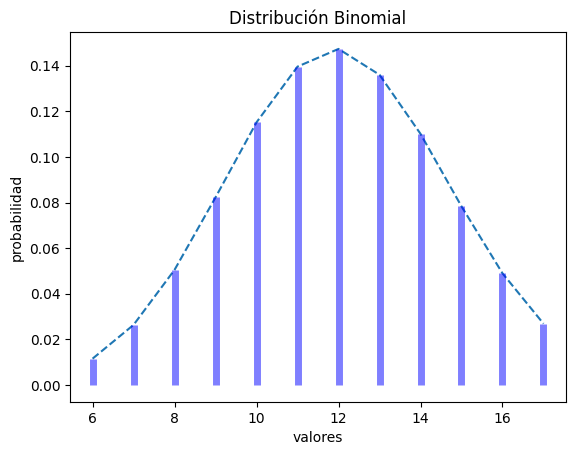

In [ ]:
# Graficando Binomial
N, p = 30, 0.4 # parámetros de forma
binomial = stats.binom(N, p) # Distribución binomial
x = np.arange(binomial.ppf(0.01), #Percentil 0.01 hasta el percentil 0.99
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

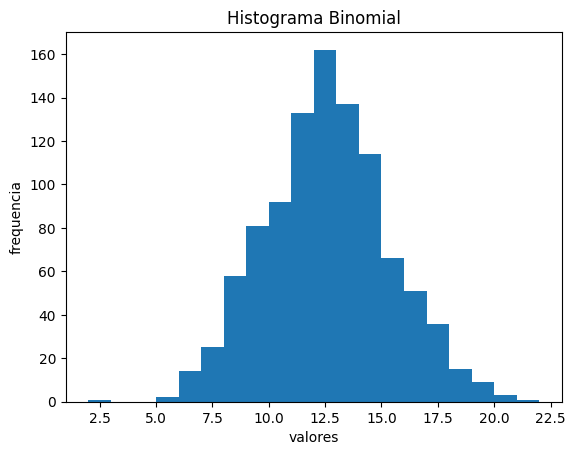

In [ ]:
# histograma
aleatorios_b = binomial.rvs(1000)  # genera aleatorios
frecuencias, bins, ignorar = plt.hist(aleatorios_b, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()

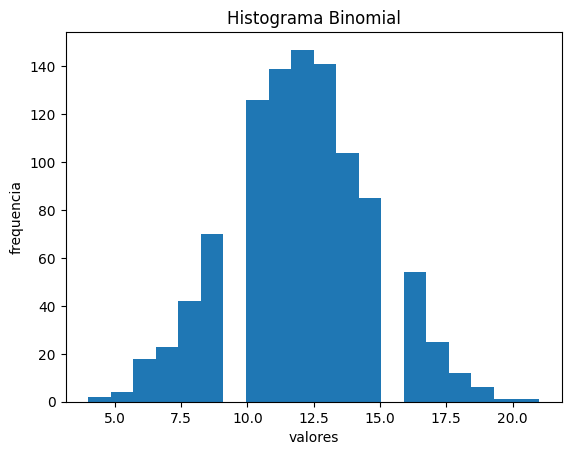

In [ ]:
#otra forma
# histograma
aleatorios_b = stats.binom(N, p).rvs(1000) # genera aleatorios
frecuencias, bins, ignorar = plt.hist(aleatorios_b, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()

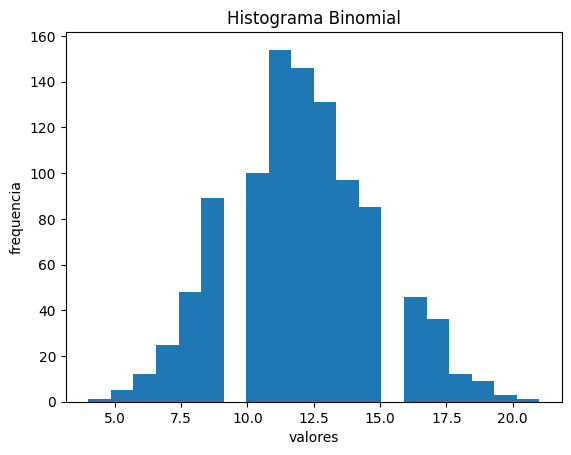

In [ ]:
#otra forma con Numpy
# histograma
aleatorios_b = np.random.binomial(N, p, size=1000) # genera aleatorios
frecuencias, bins, ignorar = plt.hist(aleatorios_b, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()

In [ ]:
# Calculemos los parámetros de la población
print(f'Media poblacional\t\t= {aleatorios_b.mean():4.2f}')
print(f'Desviación estándar poblacional\t= {aleatorios_b.std():4.2f}')
print(f'Mediana poblacional\t\t= {np.median(aleatorios_b):4.2f}')
print(f'Moda poblacional es {stats.mode(aleatorios_b)[0]} y se repite {stats.mode(aleatorios_b)[1]} veces')

Media poblacional		= 12.15
Desviación estándar poblacional	= 2.63
Mediana poblacional		= 12.00
Moda poblacional es 12 y se repite 153 veces


### <font color='green'>Actividad 2</font>

__Ejercicio 1__

Un entrenador de atletismo, tiene estadísticas de una de sus pupilas desde hace dos años. Antonia, la pupila, ha ganado 72 de las 120 carreras en las que ha competido. Suponiendo que las competiciones sean independientes entre sí y que no hay otras variables que afecten la siguiente competición:

a) Crear y graficar la distribución

b) ¿Cuál es la probabilidad de que Antonia gane 1 carrera de 4?

c) ¿Cuál es la probabilidad de que Antonia gane al menos 1 carrera de 4?

d) ¿Cuál es la probabilidad de que Antonia gane al menos 1 carrera de 10?



__Ejercicio 2 (Opcional)__

En un examen formado por 20 preguntas, cada una de las cuales se responde declarando “verdadero” o “falso”, el alumno sabe que, históricamente, en el 75% de los casos la respuesta correcta es “verdadero” y decide responder al examen tirando dos monedas: pone “falso” si ambas monedas muestran una cara y “verdadero” si al menos hay una cruz. Se desea saber:
1. Cuál es la probabilidad de que tenga más de 14 aciertos?
2. Cuál es la media de aciertos mediante esta técnica (tirar dos monedas)?

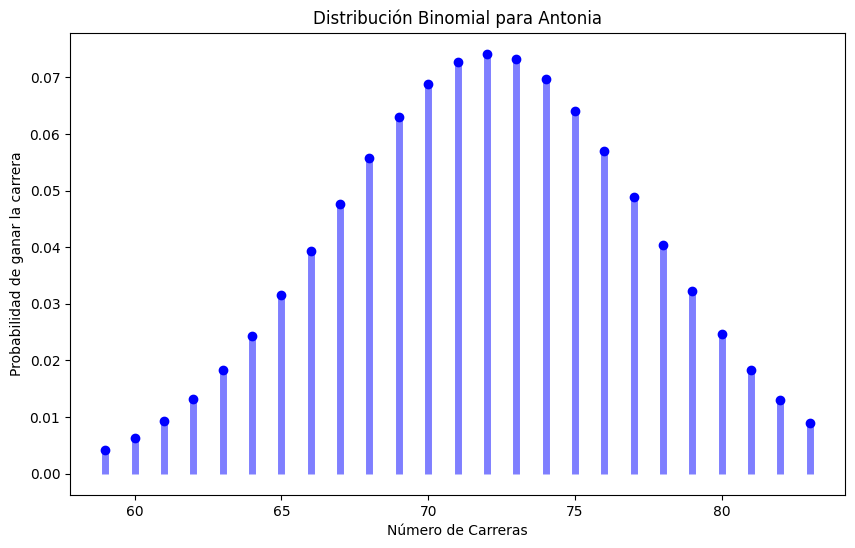

In [ ]:
#  EJERCICIO 1
#  a) Crear y graficar la distribución

# Distribución binomial

N = 120  # Número total de carreras
p = 72 / N  # Probabilidad de ganar una carrera
binomial = stats.binom(N, p)  # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))

fmp = binomial.pmf(x) # Función de Masa de Probabilidad

plt.figure(figsize=(10, 6))

plt.plot(x, fmp, 'bo')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial para Antonia')
plt.ylabel('Probabilidad de ganar la carrera')
plt.xlabel('Número de Carreras')
plt.show()

In [ ]:
#  b) ¿Cuál es la probabilidad de que Antonia gane 1 carrera de 4?

N, p = 4, 72/120
prob_1_de_4 = stats.binom(N, p)
print(f'La probabilidad de que Antonia gane 1 carrera de 4 es {prob_1_de_4.pmf(1).round(3):.4f}')

La probabilidad de que Antonia gane 1 carrera de 4 es 0.1540


In [ ]:
#  c) ¿Cuál es la probabilidad de que Antonia gane al menos 1 carrera de 4?

N, p = 4, 72/120
prob_al_menos_1_de_4 = stats.binom(N, p)
prob_al_menos_1_de_4 = 1 - prob_al_menos_1_de_4.pmf(0)
print(f'La probabilidad de que Antonia gane al menos 1 carrera de 10 es {prob_al_menos_1_de_4:.4f}')

La probabilidad de que Antonia gane al menos 1 carrera de 10 es 0.9744


In [ ]:
#  d) ¿Cuál es la probabilidad de que Antonia gane al menos 1 carrera de 10?

N, p = 10, 72/120
prob_al_menos_1_de_10 = stats.binom(N, p)
prob_al_menos_1_de_10 = 1 - prob_al_menos_1_de_10.pmf(0)
print(f'La probabilidad de que Antonia gane al menos 1 carrera de 10 es {prob_al_menos_1_de_10:.4f}')

La probabilidad de que Antonia gane al menos 1 carrera de 10 es 0.9999


In [ ]:
#  EJERCICIO 2

# 1. Cuál es la probabilidad de que tenga más de 14 aciertos?


N = 20     # Número de preguntas V o F
p = 0.75   # Probabilidad de que la respuesta sea "verdadero"
q = 1 - p  # Probabilidad de que la respuesta sea "falso"

binomial_2 = stats.binom(N, p)           # Distribución binomial
x_2 = np.arange(binomial_2.ppf(0.001),   # Percentil 0.01 hasta el percentil 0.99
          #     binomial_2.ppf(0.999)+1) # Solución dada por profesor sumo 1
                binomial_2.ppf(0.999))
fmp_2 = binomial_2.pmf(x)                # Función de Masa de Probabilidad


# Probabilidad de obtener al menos una cruz al lanzar dos monedas en 14 aciertos
prob_mas_de_14_aciertos = 1 - binomial_2.cdf(14)
print(f'La probabilidad de tener más de 14 aciertos es {prob_mas_de_14_aciertos:.4f}')


La probabilidad de tener más de 14 aciertos es 0.6172


In [ ]:
# 2. Cuál es la media de aciertos mediante esta técnica (tirar dos monedas)?

# aleatorios_2 = N * p

aleatorios_2 = binomial_2.rvs(20)
print(f'La media de aciertos es {aleatorios_2.mean():.4f}')

La media de aciertos es 14.6500


<font color='green'>Fin actividad 2</font>

### <font color='blue'>**Distribución Poisson**</font>

La [Distribución Poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson) debe su nombre al matemático francés Simeón Denis Poisson (1781-1840), aunque ya había sido introducida en 1718 por Abraham De Moivre (1667-1754).


 La __Distribución Poisson__ describe la probabilidad de encontrar exactamente $x$ eventos en un lapso de tiempo (o también de otro parámetro tal como: distancia, área, volúmen, etc.), si los acontecimientos se producen de forma independiente a una velocidad constante $\lambda$. Es una de las distribuciones más utilizadas en estadística. Algunos ejemplos de fenómenos que se ajustan a una distribución de Poisson son los siguientes:
* El número de accidentes de tráfico en una ciudad
durante una semana.
* El número de emergencias que llegan a un servicio de urgencia hospitalaria.
* El número de robos denunciados en un mes en la ciudad de Valparaíso.
* el número de llamadas telefónicas que llegan a la central de una gran empresa en hora punta.
* Cantidad de hijos.
* Personas en una fila.
* Camiones entrando a puerto.
* DPU (defectos por unidad).
* Pérdida de maletas por vuelo.
* Número de pacientes que llegan a un consultorio en un lapso dado.
* Número de llamadas que recibe un servicio de atención a urgencias durante 1 hora.
* Número de células anormales en una superficie histológica.
* Número de glóbulos blancos en un milímetro cúbico de sangre.
* Número de fallos en un lote de materiales.

Es importante destacar que esta distribución, también denominada
**"de los sucesos raros"**, es particularmente útil para resolver
problemas de **colas y líneas de espera**.

Se puede entender como **un caso particular** de la Binomial que utilizamos para determinadas distribuciones en las que el cálculo de la probabilidad es
engorroso debido, bien a que el número de pruebas ($n$) es excesivamente elevado o bien a que la probabilidad de éxito ($p$) es excesivamente baja/pequeña; en ambos casos la media ($n*p$) es muy pequeña en relación al número de pruebas ($n$). En estos casos se puede demostrar que la distribución binomial **converge a** o tiende a comportarse como una **Distribución de Poisson**.

Por tratarse de un caso particular de la Binomial, la distribución de Poisson cumple los requisitos del Proceso de Bernoulli y la variable aleatoria ($X$) sigue definiéndose como:

$$ X: \text {número  de éxitos resultantes en la sucesión de Bernuilli }\ $$

Diremos que $X$ se distribuye como una distribución Poisson con parámetro $\lambda$

$$ X \sim{P(\lambda) } $$

Su  función de cuantía  es:

$$f(x) = P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$$


donde:

$ \lambda =n*p $, con $\lambda \gt 0, \lambda \in \mathbb{R}^+$ : representa a la media de la población o muestra, también se define como la **tasa de ocurrencia** (e.g., cantidad de personas promedio que llegan a una cola de un banco por unidad de tiempo (hora).

$k!$ : es el factorial de eventos de $k$, con $k \ge 0, k \in \mathbb{N}$

$e$ : es el número exponencial.

Como regla práctica entenderemos que es aplicable la distribución de Poisson **en aquellas binomiales cuya media
tenga un valor inferior a 5 y el número de pruebas sea
superior a 30**, o si el número de pruebas $n$ es grande, pero la probabilidad de éxito $p$ es pequeña, siendo $\lambda = n*p$. Podemos considerar que la aproximación Poisson-Binomial es “buena” si $n \ge 20\;$ y $\;p \le 0.05\;$, y “muy buena” si $\;n \ge 100\;$ y $\:p \le 0.01$.

__USOS:__

* Contador de Geiger. Es un instrumento para medir la radiactividad de un objeto o zona. Se utiliza la distribución de Poisson para calcular el comportamiento estadístico de la radiación y así poder establecer su nivel.

* Operaciones bursátiles. En el mundo de los mercados y la bolsa se utiliza la distribución de Poisson para calcular el riesgo de las operaciones en los tiempos de espera entre transacciones financieras.

* Contador de personas. Los contadores de personas que habitualmente se utilizan en los comercios para saber el número de personas que entran en su establecimiento durante un periodo de tiempo (número de clientes en la última hora, por ejemplo).

* Otras aplicaciones. Otros ejemplos del uso de esta distribución son el cálculo de las llamadas de teléfono que se reciben en un día en un Call Center, hallar el número de bacterias que hay en un volumen de determinado de agua, el número de peticiones de servicio diarias de un servidor web, establecer el riesgo de crédito en una operación de financiación, calcular la cantidad de estrellas en un determinado volumen espacio o el número de accidentes por año registrados por una compañía de seguros.

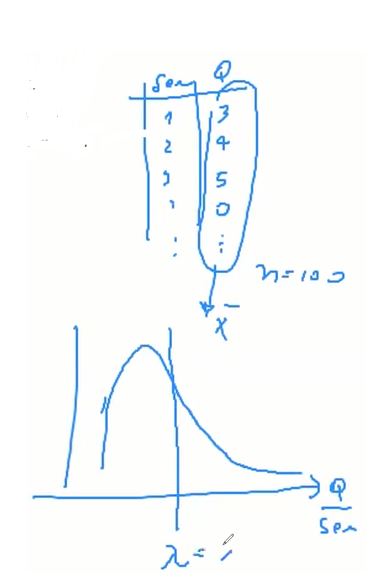

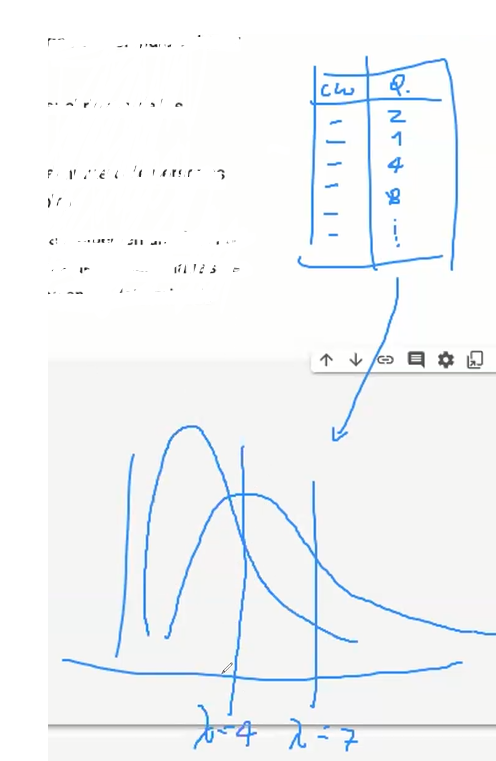


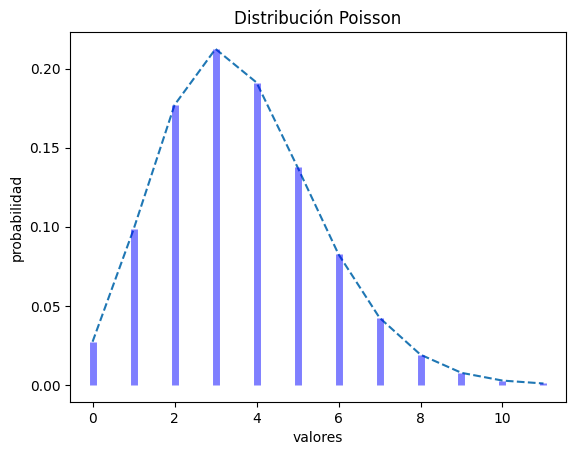

In [ ]:
# Graficando Poisson
l =  3.6 # parametro de forma (parametro lambda)

# Creamos la distribución con un objeto de tipo "frozen"
# Este objeto conoce sus parámetros de forma; en este caso 'mu'
poisson = stats.poisson(l)

x = np.arange(poisson.ppf(0.001),
              poisson.ppf(0.999)+1)  # Modificado en clases por el profe para que llegue al 11
fmp = poisson.pmf(x)                 # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

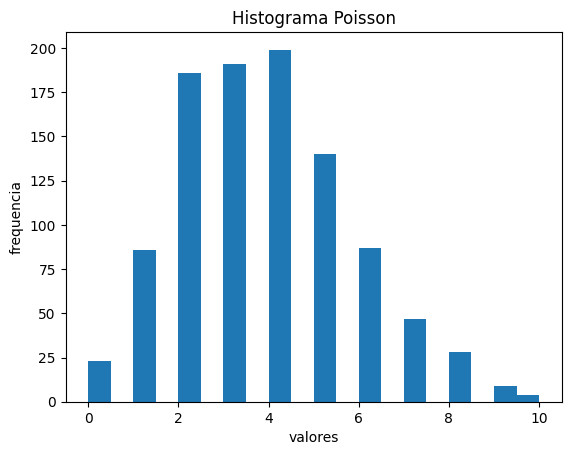

In [ ]:
# histograma
# aleatorios_p = poisson.rvs(1000)  # genera aleatorios
aleatorios_p = stats.poisson(l).rvs(1000)  # genera aleatorios. Es una L minuscula

frecuencias, bins, ignorar = plt.hist(aleatorios_p, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Poisson')
plt.show()

In [ ]:
aleatorios_p = np.random.RandomState(seed=2).poisson(l, size=1000)
print(aleatorios_p)

[ 1  4  4  2  4  2  1  2  3  6  6  5  3  1  6  2  4  4  3  4  3  2  4  6
  4  6  4  1  1  3  2  4  2  5  2  1  2  1  5  4  3  5  7  1  0  3  5  3
  8  4  6  2  5  6  3  5  3  2  3  2  5  4 10  4  4  1  1  2  4  7  3  4
  2  2  2  4  2  3  7  1  3  4  1  3  4  4  3  2  4  3  2  4  4  3  7  2
  5  6  1  4  4  5  7  3  5  7  4  4  3  4  6  5  3  3  3  2  4  3  2  6
  2  1  5  3  2  4  3  4  2 10  4  2  3  7  3  3  2  5  2  5  4  3  4  3
  2  4  4  7  3  4  4  4  1  2  3  5  5  2  4  3  5  3  6  6  4  2  4  7
  9  2  4  2  4  5  1  3  1  4  1  6  5  3  4  1  1  5  4  5  1  2  2  2
  3  2  2  1  2  0  1  4  5  3  6  3  4  3  3  5  4  3  5  4  3  6  4  3
  1  1  2  6  7  5  4  2  2  5  3  2  6  1  5  2  8  3  5  5  3  3  2  3
  4  2  6  5  1  3  7  2  3  4  4  4  5  3  2  1  1  5  2  4  4  1  4  4
  3  3  4  6  4  2  3  0  2  9  9  3  4  3  2  3  6  2  4  3  3  0  3  5
  6  3  5  1  3  4  6  7  3  1  4  7  1  2  1  3  4  4  3  4  2  3  3  1
  4  1  2  4  2  8  2  1  6  4  6  2  2  4  4  4  2

In [ ]:
# Calculamos los parámetros:
print(f'Media poblacional\t\t= {aleatorios_p.mean():>5.2f}')
print(f'Desviación estándar poblacional\t= {aleatorios_p.std():>5.2f}')
print(f'Mediana poblacional\t\t= {np.median(aleatorios_p):>5.2f}')
print(f'Moda poblacional es {stats.mode(aleatorios_p)[0]} y se repite {stats.mode(aleatorios_p)[1]} veces')

Media poblacional		=  3.58
Desviación estándar poblacional	=  1.85
Mediana poblacional		=  3.00
Moda poblacional es 3 y se repite 202 veces


###<font color='green'>Actividad 3</font>
El número de enfermos que solicitan atención de urgencia en un hospital durante un periodo de 24 horas tiene una media de 43.2 pacientes. Se sabe que el servicio se colapsará si el número de enfermos excede de 50.
* ¿Cuál es la probabilidad de que se colapse el servicio de
urgencias del hospital?
* Representar la función de masa de probabilidad.
* Representar la función de distribución acumulada.

In [ ]:
# Tu código aquí ...

# ¿Cuál es la probabilidad de que se colapse el servicio de urgencias del hospital?

from scipy import stats

lda = 43.2   # lambda : Media
k = 50       # pacientes_colapso
prob_colapso = 1 - stats.poisson.cdf(k, l)
print(f'La probabilidad de que se colapse el servicio de urgencias del hospital es {prob_colapso:>5.4f}')

# Pr{X > 50} = 1 - Pr{X <= 50} = 1 - F(50) = 0.1343.

La probabilidad de que se colapse el servicio de urgencias del hospital es 0.1343


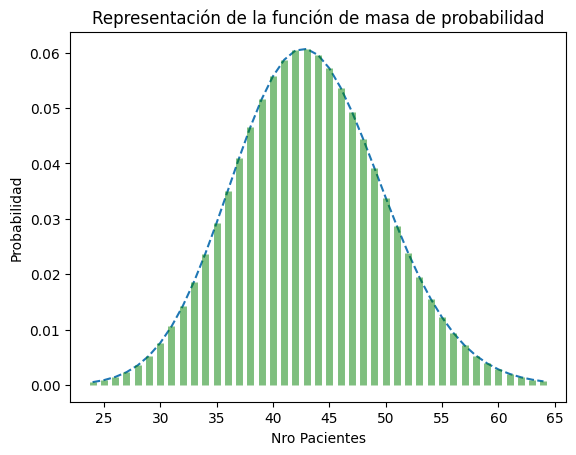

In [ ]:
# Representar la función de masa de probabilidad

poisson = stats.poisson(lda)

x = np.arange(poisson.ppf(0.001),
              poisson.ppf(0.999))
fmp_pacientes = poisson.pmf(x)   # Función de Masa de Probabilidad

plt.plot(x, fmp_pacientes, '--')
plt.vlines(x, 0, fmp_pacientes, colors='g', lw=5, alpha=0.5)
plt.title('Representación de la función de masa de probabilidad')
plt.ylabel('Probabilidad')
plt.xlabel('Nro Pacientes')
plt.show()

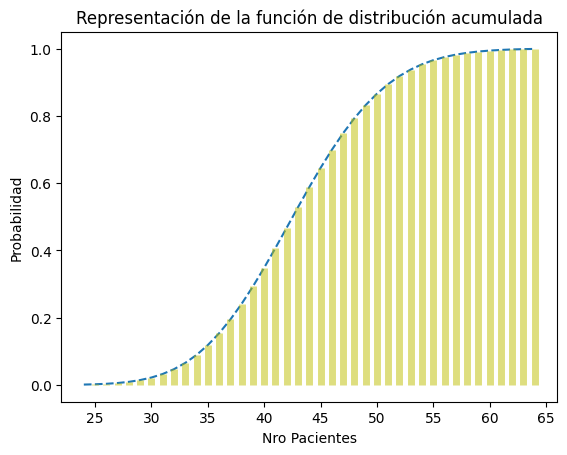

In [ ]:
# Representar la función de distribución acumulada.

cdf_acum = poisson.cdf(x)    # Función de Distribución Acumulada

plt.plot(x, cdf_acum, '--')
plt.vlines(x, 0, cdf_acum, colors='y', lw=5, alpha=0.5)
plt.title('Representación de la función de distribución acumulada')
plt.ylabel('Probabilidad Acumulada')
plt.xlabel('Nro Pacientes')
plt.show()


<font color='green'>Fin actividad 3</font>

## <font color='blue'>**¿Cómo elegir la distribución que mejor se ajusta a mis datos?**</font>

Ahora ya tenemos un conocimiento general de las principales distribuciones con que nos podemos encontrar; pero ¿cómo determinamos que distribución debemos utilizar?

Un modelo que podemos seguir cuando nos encontramos con datos que necesitamos ajustar a una distribución, es comenzar con los datos sin procesar y responder a cuatro preguntas básicas acerca de los mismos, que nos pueden ayudar a caracterizarlos.

La **primer pregunta** se refiere a si los datos **pueden tomar valores discretos** o **continuos**.

La **segunda pregunta** que nos debemos hacer, hace referencia a la [simetría](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica) de los datos y, si es que hay asimetría, en qué dirección se encuentra; en otras palabras, son los [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico) positivos y negativos igualmente probables o es uno más probable que el otro.

**La tercer pregunta** abarca los **límites superiores e inferiores en los datos**; hay algunos datos, como los ingresos, que no pueden ser inferiores a cero, mientras que hay otros, como los márgenes de operación que no puede exceder de un valor (100%).

**La última pregunta** se refiere a la **posibilidad de observar valores extremos** en la distribución; en algunos casos, los valores extremos ocurren con muy poca frecuencia, mientras que en otros, se producen con mayor frecuencia.

Este proceso, lo podemos resumir en el siguiente gráfico:

![Distribuciones estadísticas](https://drive.google.com/uc?export=view&id=1PbM9bpceTDS3hpTfCA3-o6ZZYEafPlrA)



Con la ayuda de estas preguntas fundamentales, más el conocimiento de las distintas distribuciones deberíamos estar en condiciones de poder caracterizar cualquier conjunto de datos.

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">
Contenido opcional

## <font color='blue'>**Otras distribuciones discretas**</font>
Las siguientes distribuciones discretas, si bien son utilizadas, tienen una presencia relativa muy menor en trabajos de análisis de datos.

### <font color='blue'>**Distribución Geométrica**</font>

Consideramos una sucesión de variables aleatorias independientes que se distribuyen Bernoulli. Es decir una sucesión de pruebas independientes con dos posibles resultados y con probabilidad de éxito constante e idéntica en cada prueba.

La [Distribución Geométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_geom%C3%A9trica) expresa la probabilidad de tener que **esperar exactamente $x$ pruebas hasta encontrar el primer éxito** si la probabilidad de éxito en una sola prueba es $p$.

Si consideramos la variable aleatoria

$$ X: \text {nº de experiencias realizadas hasta obtener el primer éxito }\ $$

diremos que la variable aleatoria $X$ sigue una Distribución Geométrica.

$$ X \sim G{(p) } $$

$p$: probabilidad de éxito, $0 \lt p \lt 1$

La Distribución de Masa de Probabilidad es:

$$f(x)= P(X=k) = p(1- p)^{k-1}
$$

En donde $k \ge 1, k \in	\mathbb{N}$,  y el parámetro $p$ ($0 \le p \le 1$) es un número real.



Supóngase que se efectúa repetidamente un experimento o prueba, que las repeticiones son independientes y que se está interesado en la ocurrencia o no de un suceso al que se refiere como “éxito”, siendo la probabilidad de este suceso $p$. La distribución geométrica permite calcular la probabilidad de que tenga que realizarse un número $x$ de repeticiones antes de obtener un éxito por primera vez; esta probabilidad decrece a medida que aumenta $x$ con lo que la función de masa de probabilidad es siempre decreciente. Así pues, se diferencia de la distribución binomial en que el número de repeticiones no está predeterminado, sino que es la variable aleatoria que se mide y, por otra parte, el conjunto de valores posibles de la variable es ilimitado.

Esta distribución presenta la propiedad denominada **falta de memoria**, que implica que la probabilidad de tener que esperar un tiempo $t$ no depende del tiempo que ya haya
transcurrido.

Ejemplo:

Un matrimonio quiere tener una hija, y por ello deciden tener hijos hasta el nacimiento de la esperada hija.  Calcular la probabilidad de que la pareja acabe teniendo tres hijos o más.

Desarrollo:

Sea  $p=0.5$ la probabilidad de tener una hija (éxito) y

$k=3$

$$
f(x)= P(X=k) = p(1- p)^{k-1}
$$

Para calcular la probabilidad de que la pareja acabe teniendo tres hijos o más, entonces:

$$
\begin{split}
P(X \ge {3}) &= 1 - P(X < {3}) \\
P(X \ge {3}) &= 1 - [P(X = {1})+ P(X = {2})]
\end{split}
$$

Donde:

$$
\begin{split}
P(X=1) &= 0.5(1- 0.5)^0 = 0.5
\\
P(X=2) &= 0.5(1- 0.5)^1 = 0.5^2
\end{split}
$$

Luego:
$$
\begin{split}
P(X \ge {3}) &= 1 - [P(X = {1}) + P(X = {2})] \\
&= 1 - [0.5+0.5^2] \\
&= 1 - 0.75 \\
P(X \ge {3}) &= 0.25
\end{split}
$$

La probabilidad de que la pareja acabe teniendo tres hijos o más es de 0.25.

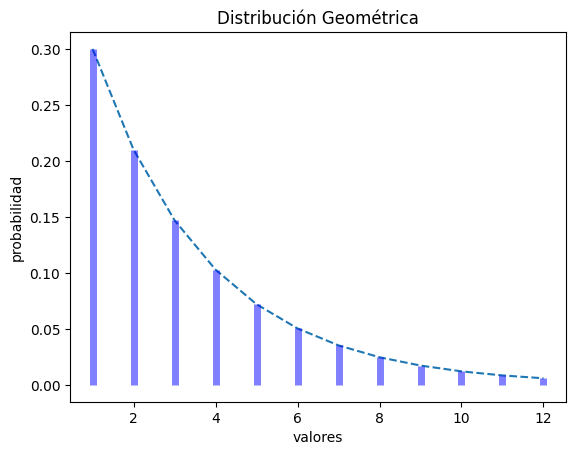

In [ ]:
# Graficando Geométrica
p =  0.3 # parametro de forma
geometrica = stats.geom(p) # Distribución
x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

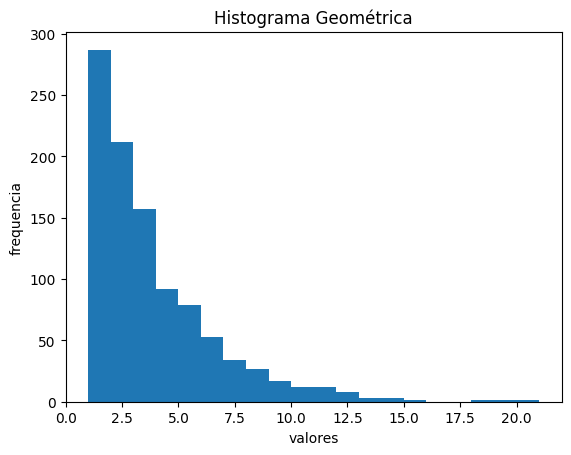

In [ ]:
# histograma
aleatorios_g = geometrica.rvs(1000)  # genera aleatorios
frecuencia, cajas, ignorar = plt.hist(aleatorios_g, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Geométrica')
plt.show()

In [ ]:
# Calculemos los parámetros de la población
print(f'Media poblacional\t\t= {aleatorios_g.mean():4.2f}')
print(f'Desviación estándar poblacional\t= {aleatorios_g.std():4.2f}')
print(f'Mediana poblacional\t\t= {np.median(aleatorios_g):4.2f}')
print(f'Moda poblacional es {stats.mode(aleatorios_g)[0]} y se repite {stats.mode(aleatorios_g)[1]} veces')

Media poblacional		= 3.37
Desviación estándar poblacional	= 2.75
Mediana poblacional		= 3.00
Moda poblacional es 1 y se repite 287 veces


###<font color='green'>Actividad 4</font>
La probabilidad de que cierto examen médico dé lugar a una reacción “positiva” es igual a 0.8, ¿cuál es la probabilidad de que ocurran menos de 5 reacciones “negativas” antes de la primera positiva?
La variable aleatoria “número de reacciones negativas antes de la primera positiva” sigue una distribución geométrica con parámetro $p = 0.8$.

In [11]:
# Tu código aquí ...
from scipy.stats import geom

# Definir la probabilidad de éxito (resultado positivo)
p = 0.8

# Calcular la probabilidad de que ocurran menos de 5 reacciones negativas antes de la primera positiva
probabilidad_menos_de_5 = sum(geom.pmf(k, p) for k in range(1, 5))

print(f"La probabilidad de que ocurran menos de 5 reacciones negativas antes de la primera positiva es aproximadamente {probabilidad_menos_de_5:.4f}")


La probabilidad de que ocurran menos de 5 reacciones negativas antes de la primera positiva es aproximadamente 0.9984


<font color='green'>Fin actividad 4</font>

### <font color='blue'>**Distribución Hipergeométrica**</font>

Hasta ahora hemos analizado distribuciones que modelaban situaciones en las que se realizaban pruebas que entrañaban una dicotomía (proceso de Bernoulli) de manera que, en cada experiencia, la probabilidad de obtener cada uno de los dos posibles resultados se mantenía constante.
Sin embargo, si la población es pequeña y las extracciones no se remplazan, las probabilidades **no se mantendrán constantes**. La [Distribución Hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica) viene a cubrir esta necesidad de modelar procesos de Bernoulli con probabilidades no constantes (sin reemplazamiento).

La distribución hipergeométrica es especialmente útil en todos aquellos casos en los que **se extraigan muestras o se realicen experiencias repetidas sin devolución del elemento extraído o sin retornar a la situación experimental inicial**.

Es una distribución fundamental en el estudio de **muestras pequeñas de poblaciones pequeñas y en el cálculo de probabilidades de juegos de azar**.

Tiene grandes aplicaciones en el control de calidad para  procesos experimentales en los que no es posible retornar a la situación de partida.

Las consideraciones a tener en cuenta en una distribución hipergeométrica son:

* El proceso consta de __$n$__ pruebas, separadas o separables de entre un conjunto de __$N$__ pruebas posibles.

* Cada una de las pruebas puede dar únicamente **dos resultados mutuamente excluyentes**.

* El número de individuos que presentan la característica $A$ (éxito) es $k$.

Diremos entonces que la variable aleatoria $X$ sigue una Distribución Hipergeométrica.


$$ X \sim HGeo{(N,n,p) } $$

donde $ p= \frac {k}{N}\ $

Se define la variable aleatoria

$$ X = \text{nº de éxitos obtenidos}\$$.

La función de masa de esta variable es:

$$p(X=x) = \frac{\left(\begin{array}{c} k \\ x \end{array}\right)\left(\begin{array}{c} N - k\\ n -x \end{array}\right)}{\left(\begin{array}{c} N \\ n \end{array}\right)}
$$




Donde:<br>
$N$: tamaño de la población, con $N \ge 1, N \in \mathbb{N}$)<br>
$k$: número de éxitos en la población, con $k \ge 1, k  \in \mathbb{N}$<br>
$n$: número de pruebas, con $1 \le n \le N$<br>
$x$: número de indivudios que pertenecen a la categoría, $x \in [\min(n,k), \quad \max(0, n-N+k)]$<br>

Más precisamente, supongamos que tenemos $N$ elementos de los cuales $k$ tienen un cierto atributo y ($N - k$) no lo tiene. Si escogemos $n$ elementos al azar *sin reemplazo*, $p(k)$ es la probabilidad de que exactamente $k$ de los elementos seleccionados provienen del grupo con el atributo.

Ejemplo:

De cada 20 piezas fabricadas por una máquina, hay 2 que son defectuosas. Para realizar un   control de calidad, se observan 15 elementos y se rechaza el lote si hay alguna que sea defectuoso. Vamos a calcular la probabilidad de que el lote sea rechazado.

Solución:

$$ X = \text{ nº de piezas defectuosas de las 15 escogidas}\$$
$N$= 20<br>
$n$= 15<br>
$k$= 2 <br>

$$p(X=x) = \frac{\left(\begin{array}{c} k \\ x \end{array}\right)\left(\begin{array}{c} N - k\\ n -x \end{array}\right)}{\left(\begin{array}{c} N \\ n \end{array}\right)}
$$


Para calcular la probabilidad de que al revisar el lote de 15 productos, haya más de un artículo defectuoso, es:

$$
\begin{split}
P(X \geq {1}) &= 1- P(X < {1}) \\
P(X \geq {1}) &= 1- P(X < {1}) = 1 - P(X = {0})
\end{split}
$$

Donde:

$$
\begin{split}
P(X=0) &= \frac{\left(\begin{array}{c} 2 \\ 0 \end{array}\right)\left(\begin{array}{c} 20 - 2\\ 15 -0 \end{array}\right)}{\left(\begin{array}{c} 20 \\ 15 \end{array}\right)}\\
\\
(X \geq {1}) &= 0.947
\end{split}
$$

Si el tamaño de la muestra $n$ es pequeño comparado con el tamaño de la población $N$, la distribución hipergeométrica puede ser aproximada por
una distribución binomial con probabilidad de éxito $p=\frac{k}{N}$.

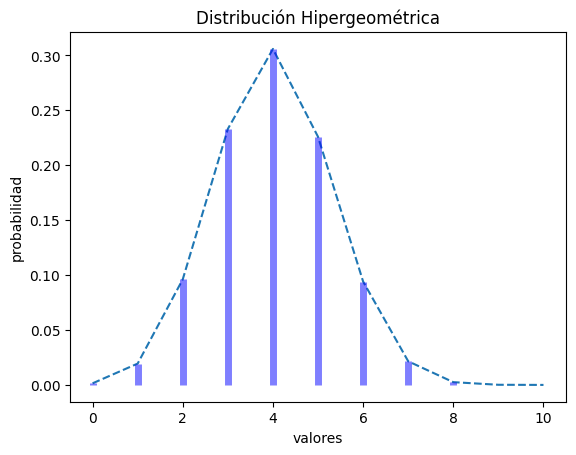

In [ ]:
# Graficando Hipergeométrica
M, n, N = 30, 10, 12 # parametros de forma
hipergeometrica = stats.hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

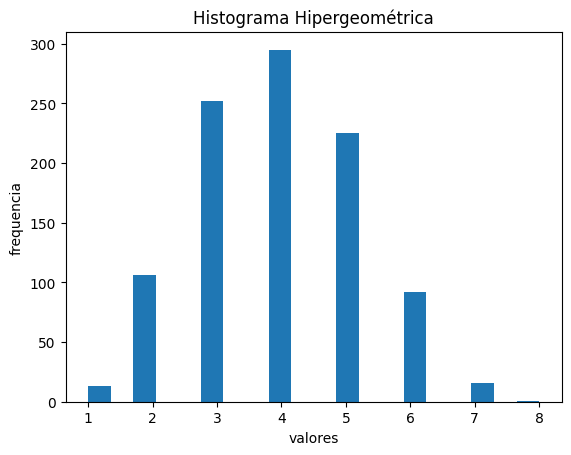

In [ ]:
# histograma
aleatorios_h = hipergeometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios_h, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Hipergeométrica')
plt.show()

In [ ]:
# Calculemos los parámetros de la población
print(f'Media poblacional\t\t= {aleatorios_h.mean():4.2f}')
print(f'Desviación estándar poblacional\t= {aleatorios_h.std():4.2f}')
print(f'Mediana poblacional\t\t= {np.median(aleatorios_h):4.2f}')
print(f'Moda poblacional es {stats.mode(aleatorios_h)[0]} y se repite {stats.mode(aleatorios_h)[1]} veces')

Media poblacional		= 3.96
Desviación estándar poblacional	= 1.24
Mediana poblacional		= 4.00
Moda poblacional es 4 y se repite 295 veces


## <font color='purple'> __EXPERIMENTO__: </font>

Simularemos las carreras de Antonia utilizando la distribución binomial que hemos calculado. Vamos a simular un número específico de competiciones y analizar los resultados. A continuación, se presenta un ejemplo de cómo podríamos hacer esto:

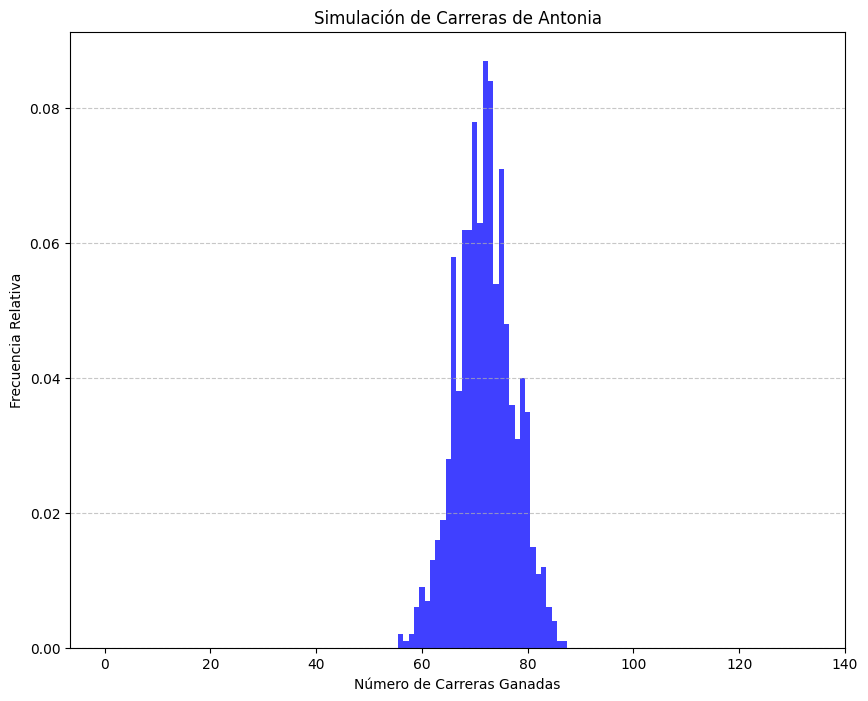

En la simulación de 1000 carreras, el promedio de carreras ganadas por Antonia fue de 71.90 con una desviación estándar de 5.30.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Datos proporcionados
N_total = 120  # Número total de carreras
p_exito = 72 / N_total  # Probabilidad de ganar una carrera

# Simular las carreras de Antonia
num_simulaciones = 1000  # Número de simulaciones
resultados_simulacion = np.random.binomial(N_total, p_exito, num_simulaciones)

# Graficar el histograma de los resultados de la simulación
plt.figure(figsize=(10, 8))
plt.hist(resultados_simulacion, bins=np.arange(N_total + 2) - 0.5, density=True, alpha=0.75, color='blue')
plt.title('Simulación de Carreras de Antonia')
plt.xlabel('Número de Carreras Ganadas')
plt.ylabel('Frecuencia Relativa')
plt.xticks(np.arange(0, N_total + 21, 20))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calcular estadísticas de la simulación
promedio_simulacion = np.mean(resultados_simulacion)
desviacion_simulacion = np.std(resultados_simulacion)

# Conclusión del experimento
print(f"En la simulación de {num_simulaciones} carreras, el promedio de carreras ganadas por Antonia fue de {promedio_simulacion:.2f} con una desviación estándar de {desviacion_simulacion:.2f}.")



En resumen, la desviación estándar en el contexto de las carreras de Antonia nos da una medida de cuánto pueden variar sus resultados en función de las condiciones aleatorias de cada competición. Un valor más bajo sugiere una mayor consistencia en su rendimiento, mientras que un valor más alto indica una mayor variabilidad.

<font color='purple'>Fin experimento </font>

## <font color='purple'>__Material adicional__</font>

LECTURA

Algunas distribuciones discretas: Bernoulli, Binomial, Poisson, uniforme discreta, extra hipergeometrica.<br> <br>

Estadistica, ALGUNAS DISTRIBUCIONES DISCRETAS DE PROBABILIDAD, Universidad de Granada
  https://wpd.ugr.es/~bioestad/bioestadistica/tema-6/ <br> <br>


DISTRIBUCIONES UNIDIMENSIONALES DISCRETAS, Universidad de Valladolid

  https://www5.uva.es/estadmed/probvar/d_univar/d_univar8.htm <br> <br>


Tema 3: Distribuciones y Variables Aleatorias, Sebastián Bórquez G. DI UTFSM, Diciembre 2019.

  https://github.com/sborquez/Python-LEC/blob/master/3.%20Distribuciones%20y%20Variables%20Aleatorias.ipynb <br> <br>


Distribuciones Discretas Introducción, Nayibe Yesenia Arias Cortez

  https://deepnote.com/@yesenia_arias/Probabilidad-en-python-41410fa4-a08e-418c-bd9e-a6ccaf2dd60d <br> <br>


VIDEOS

Distribución de Probabilidad Discretas con Python, Profesor Naren Castellon, 13-11-2021

  https://www.youtube.com/watch?v=BBuv9S2-fVo <br> <br>


Ejercicio en PYTHON | Distribución BINOMIAL & POISSON | ESTADÍSTICA COMPUTACIONAL, Universitaty, 04-07-2023

  https://www.youtube.com/watch?v=LeCjPpYAcmU <br> <br>



<font color='purple'>Fin material adicional </font>

<img src="https://drive.google.com/uc?export=view&
id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="50" align="left" title="Runa-perth">